<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week7/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/week7/week7.ipynb 

#PRACTICUM

In [ ]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

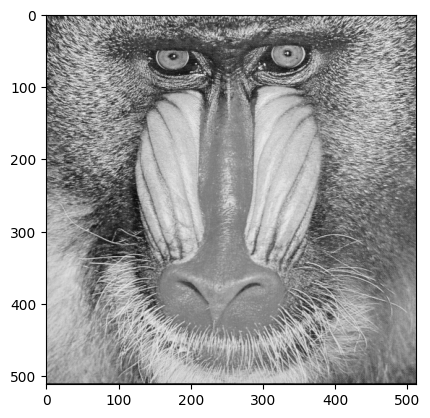

In [ ]:
  #load the image
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


#Image Sharpen

In [ ]:
  #image sharpen
kernel_sharpen = np.array([
      [0,-1,0],
      [-1,5,-1],
      [0,-1,0]
  ])


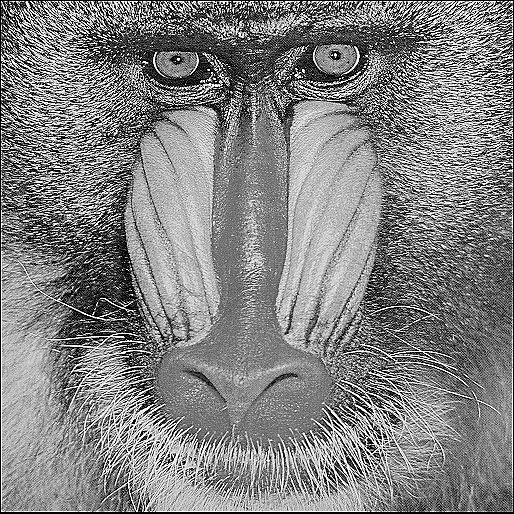

In [ ]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output

filtered_image = convolution2d(img_gray, kernel_sharpen,1,2)
cv2_imshow(filtered_image)


#Emboss

In [ ]:
  #image EMboss
kernel_emboss = np.array([
      [-2,-1,0],
      [-1,1,1],
      [0,1,2]
  ])


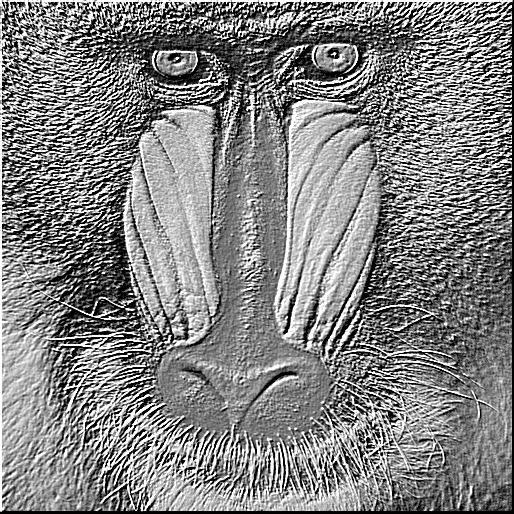

In [ ]:
filtered_image2 = convolution2d(img_gray, kernel_emboss,1,2)
cv2_imshow(filtered_image2)

#Left Sobel Edge Detection

In [ ]:
  #image Left Sobel Edge Detection
kernel_left_sobel_edge = np.array([
      [1,0,-1],
      [2,0,-2],
      [1,0,-1]
  ])


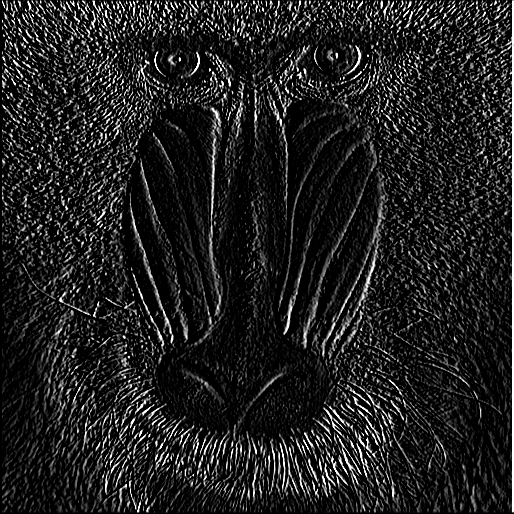

In [ ]:
filtered_image3 = convolution2d(img_gray, kernel_left_sobel_edge,1,2)
cv2_imshow(filtered_image3)

#Canny Edge Detection

In [ ]:
  #image Left Sobel Edge Detection
kernel_canny_edge_detection = np.array([
      [-1,-1,-1],
      [-1,8,-1],
      [-1,-1,-1]
  ])


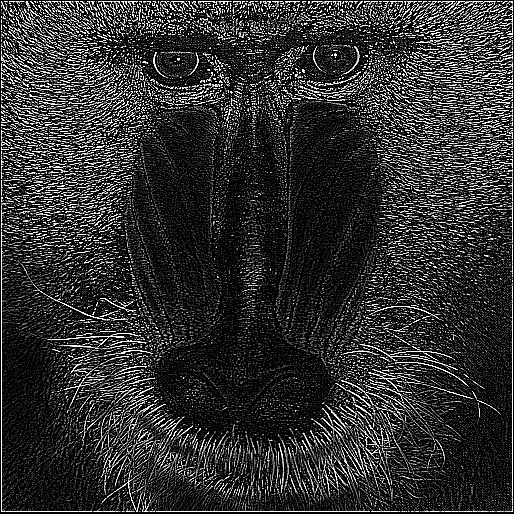

In [ ]:
filtered_image4 = convolution2d(img_gray, kernel_canny_edge_detection,1,2)
cv2_imshow(filtered_image4)

#21 x 21 Gaussian Blur

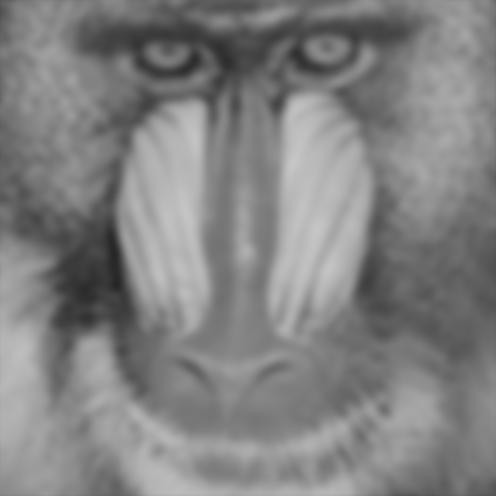

In [ ]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output


# Create a 21x21 Gaussian blur filter
# size = 21
# sigma = 5
# x, y = np.meshgrid(np.linspace(-10, 10, size), np.linspace(-10, 10, size))
# kernel = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
# kernel /= kernel.sum()

# Create a 21x21 Gaussian blur filter using the provided Gaussian kernel

kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

filtered_image5 = convolution2d(img_gray, gauss_kernel,1,2)
cv2_imshow(filtered_image5)

#Average Filter

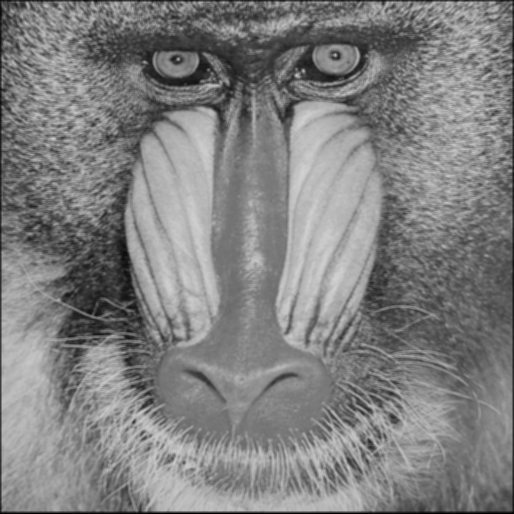

In [ ]:
# Define a 3x3 average filter
#np.ones = fill the matrix with 1s value
# average_kernel = np.ones((3, 3)) / 9.0
kernel_size = 3
average_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

filtered_image6 = convolution2d(img_gray, average_kernel,1,2)
cv2_imshow(filtered_image6)

#Low Pass Filter


This kernel assigns higher weights to the center pixel and lower weights to the surrounding pixels, with a total sum of 12

In [ ]:
  #image Low Pass Filter
kernel_low_pass = np.array([
      [1,1,1],
      [1,4,1],
      [1,1,1]
  ]) / 12
#devided by the total matrix values
#if the middle value of the matrix is higer than the surrounding value it's a low pass filter
#low pass filter commonly use for clear the noises on the image

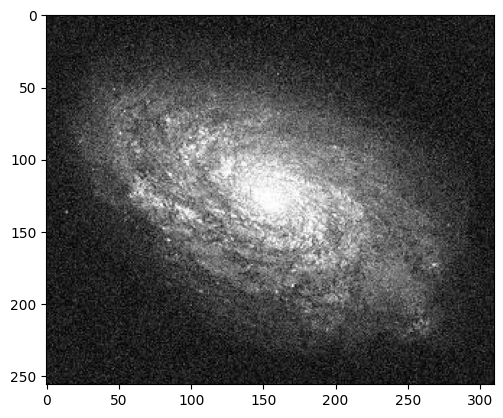

In [ ]:
  #load the image
img2 = cv.imread('/content/drive/MyDrive/100.jpg')
img_gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray2, cmap='gray')


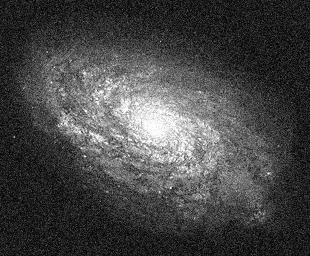

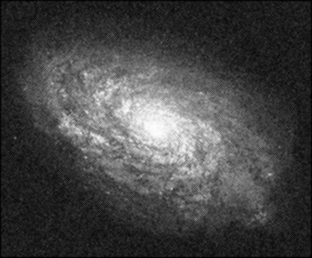

In [ ]:

filtered_image11 = convolution2d(img_gray2, kernel_low_pass,1,2)
cv2_imshow(img_gray2)
cv2_imshow(filtered_image11)

One common LPF kernel is the Gaussian kernel.

This function generates a Gaussian kernel of the specified size and standard deviation (sigma).

In [ ]:
import math

def gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

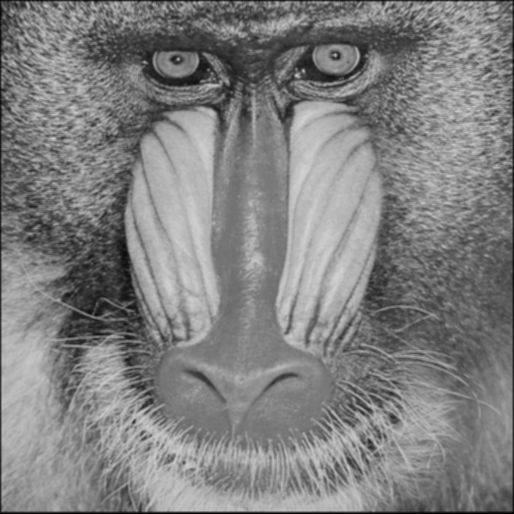

In [ ]:
kernel_size = 3
sigma = 1.4
kernel = gaussian_kernel(kernel_size, sigma)


filtered_image7 = convolution2d(img_gray, kernel,1,2)
cv2_imshow(filtered_image7)


#High Pass Filter


One common High Past Filter kernel is the Box filter, which assigns equal weights to all the pixels within the kernel

to detect the edges

the kernel matrix that already determined

In [ ]:
  #image High Pass Filter
kernel_high_pass = np.array([
      [-1,0,1],
      [-1,0,3],
      [-3,0,1]
  ])


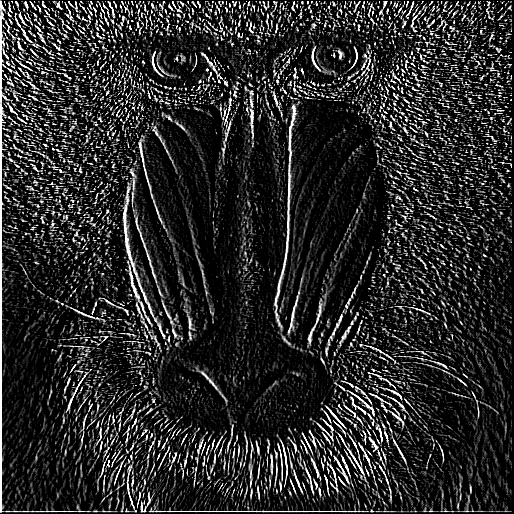

In [ ]:
filtered_image9 = convolution2d(img_gray, kernel_high_pass,1,2)
cv2_imshow(filtered_image9)

#Mode Kernel

The kernel used here is a 3x3 filter with all elements set to 1, which computes the mode of the 3x3 patch centered on each output pixel.

<ipython-input-5-294112dfb18b>:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  output_value = mode(input_patch.flatten())[0]


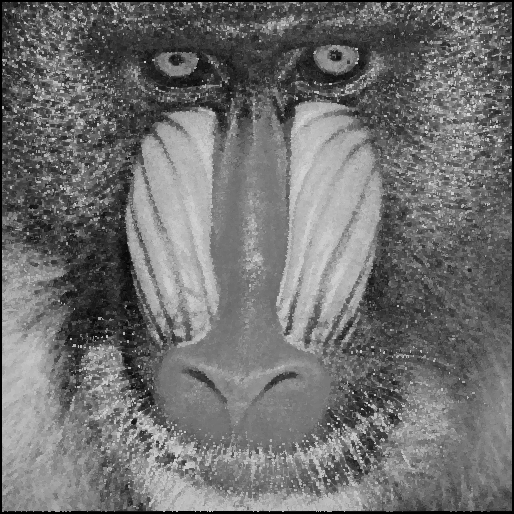

In [ ]:
from scipy.stats import mode

height, width, channels = img.shape

# Define convolution function
def convolution(image, kernel, stride, padding):
  # Compute output dimensions
  output_height = (height + 2*padding - kernel.shape[0]) // stride + 1
  output_width = (width + 2*padding - kernel.shape[1]) // stride + 1

  # Initialize output image
  output_image = np.zeros((output_height, output_width))

  # Pad input image
  padded_image = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      padded_image[i+padding, j+padding] = image[i,j]

  # Perform convolution
  for i in range(output_height):
    for j in range(output_width):
      # Compute input indices
      x = i*stride
      y = j*stride
      input_patch = padded_image[x:x+kernel.shape[0], y:y+kernel.shape[1]]

      # Compute output value
      output_value = mode(input_patch.flatten())[0]

      # Set output value
      output_image[i, j] = output_value

  return output_image

kernel_size = 3
kernel_mode = np.ones((kernel_size, kernel_size), dtype=np.uint8)
filtered_image12 = convolution(img_gray, kernel_mode,1,2)
cv2_imshow(filtered_image12)

In [ ]:
# kernel_mode = np.ones((3,3))
# filtered_image12 = convolution2d(img_gray, kernel_mode,1,2)
# cv2_imshow(filtered_image12)

#Median Filter

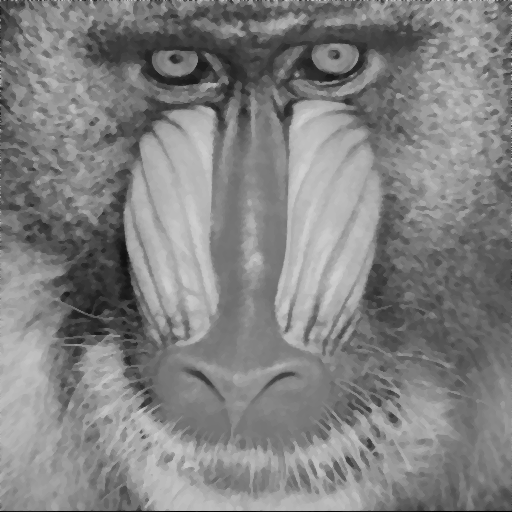

In [ ]:
from cv2 import * #Import functions from OpenCV
import cv2

    # source = cv2.imread('/content/drive/MyDrive/mandrill.tiff', CV_LOAD_IMAGE_GRAYSCALE)
final = img_gray[:]
for y in range(len(img_gray)):
  for x in range(y):
      final[y,x]=img_gray[y,x]

members=[img_gray[0,0]]*9
for y in range(1,img_gray.shape[0]-1):
  for x in range(1,img_gray.shape[1]-1):
            members[0] = img_gray[y-1,x-1]
            members[1] = img_gray[y,x-1]
            members[2] = img_gray[y+1,x-1]
            members[3] = img_gray[y-1,x]
            members[4] = img_gray[y,x]
            members[5] = img_gray[y+1,x]
            members[6] = img_gray[y-1,x+1]
            members[7] = img_gray[y,x+1]
            members[8] = img_gray[y+1,x+1]

            members.sort()
            final[y,x]=members[4]

# display(final)
cv2_imshow(final)